# Сборный проект: "Анализ Воронки Продаж и Оценка Эффективности A/A/B-Теста в Мобильном Приложении Продовольственного Стартапа"

**Описание проекта**

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.
В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

<hr style="border: 1px solid black;">

# Основные этапы проекта:

Проект включал ряд шагов по подготовке и анализу данных, а также проведение A/A/B-тестирования для оценки влияния изменения шрифтов в мобильном приложении на поведение пользователей. Основные этапы проекта охватывали:

**Подготовку данных:** данные были тщательно подготовлены, включая переименование столбцов для удобства, удаление дубликатов для повышения точности данных, и преобразование дат в соответствующий формат для упрощения анализа.

**Проверку полноты данных и отсутствие пересечений между группами:** было подтверждено, что данные полны и не содержат пропусков. Также была выполнена проверка на пересечение пользователей между экспериментальными группами, исключая возможность нарушения условий чистоты эксперимента.

**Анализ воронки событий и результатов A/A/B-тестирования:** было проанализировано поведение пользователей в мобильном приложении, включая частоту встречаемости различных событий. Кроме того, проведен статистический анализ для оценки различий между контрольными и экспериментальными группами, что позволило оценить влияние изменений в приложении.

**Статистическая проверка гипотез:** использование Z-теста для сравнения долей показало, что нет статистически значимых различий между долями пользователей, совершивших ключевые действия в приложении, в различных группах. Это указывает на то, что изменение шрифтов не оказало значительного влияния на поведение пользователей.

**Выводы из эксперимента:** на основании проведенного анализа было сделано заключение о том, что изменение шрифтов в мобильном приложении не привело к статистически значимым изменениям в поведении пользователей. Эксперимент подтвердил корректность разбиения пользователей на группы и показал, что система сплитования работает надежно.

<hr style="border: 1px solid black;">

In [1]:
# Импортируем необходимые библиотеки
from scipy import stats as st
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import datetime as dt
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

<hr style="border: 1px solid black;">

# **Шаг 1. Откройте файл с данными и изучите общую информацию**

In [2]:
# Загрузка данных
file_path = '/datasets/logs_exp.csv'
logs_exp = pd.read_csv(file_path, sep='\t')

In [3]:
# Отображение первых строк и общей информации о данных
logs_exp.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
# Отображение общей информации о данных, включая типы данных и количество непустых значений в каждом столбце
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Этот набор данных содержит информацию о пользовательских событиях в мобильном приложении. Всего в нем четыре столбца: EventName, DeviceIDHash, EventTimestamp и ExpId. 

- **EventName** обозначает название события, например появление основного экрана (MainScreenAppear) или успешное завершение платежа (PaymentScreenSuccessful).
- **DeviceIDHash** — это уникальный идентификатор устройства пользователя.
- **EventTimestamp** представляет собой временную метку события.
- **ExpId** указывает на экспериментальную группу, в которую был включен пользователь.

Всего в наборе данных 244126 записей, и все столбцы полностью заполнены. Типы данных в столбцах следующие: EventName является текстовым объектом, в то время как DeviceIDHash, EventTimestamp и ExpId — числовыми значениями целочисленного типа. Общий объем используемой памяти данных составляет 7.5 МБ.

**Промежуточный Вывод:**

Данный анализ представляет собой изучение данных о событиях в мобильном приложении, собранных в рамках эксперимента. Фрейм данных содержит 244126 записей, разделенных на 4 столбца: название события (EventName), уникальный идентификатор пользователя (DeviceIDHash), временную метку события (EventTimestamp) и идентификатор эксперимента (ExpId). Столбцы представлены в различных типах данных: строковый для названий событий и целочисленный для остальных параметров. Эти данные позволяют анализировать поведение пользователей в приложении, выявляя, какие действия они выполняют, когда эти действия происходят, и как это соотносится с различными экспериментальными группами. Такой подход может быть использован для оптимизации пользовательского интерфейса и повышения эффективности маркетинговых стратегий.

<hr style="border: 1px solid black;">

# **Шаг 2: Подготовка данных**

**Замена названий столбцов для удобства работы: приведение к более понятным и коротким именам.**

In [5]:
# Замена названий столбцов
logs_exp.columns = ['event_name', 'user_id', 'event_timestamp', 'exp_id']

**Проверка на наличие пропусков: пропущенные значения не обнаружены в данных.**

In [6]:
# Проверка на наличие пропусков
missing_values = logs_exp.isnull().sum()

missing_values

event_name         0
user_id            0
event_timestamp    0
exp_id             0
dtype: int64

**Удаление дубликатов: было обнаружено и удалено 413 дублирующих записей, что улучшает качество данных для анализа.**

In [7]:
# Подсчет количества дубликатов в данных
logs_exp.duplicated().sum()

413

In [8]:
# Удаление дубликатов из данных
logs_exp = logs_exp.drop_duplicates()

**Добавление столбцов с датой и временем: преобразование Unix timestamp в более удобные для восприятия форматы даты и времени. Это позволяет проводить временной анализ событий.**

In [9]:
# Преобразование timestamp в формат даты и времени и добавление его в отдельный столбец
logs_exp['datetime'] = pd.to_datetime(logs_exp['event_timestamp'], unit='s')

In [10]:
# Добавление отдельного столбца только для даты
logs_exp['date'] = logs_exp['datetime'].dt.date

In [11]:
# Преобразование столбца 'date' в тип datetime64
logs_exp['date'] = logs_exp['date'].astype('datetime64')

**Проверка на пересечение пользователей между экспериментальными группами: подтверждено отсутствие пользователей, которые были бы включены в более чем одну экспериментальную группу.**

In [12]:
# Проверка на пересечение пользователей между экспериментальными группами
user_groups = logs_exp.groupby('user_id')['exp_id'].nunique()

In [13]:
# Пользователи, находящиеся в более чем одной экспериментальной группе
users_in_multiple_groups = user_groups[user_groups > 1]
users_in_multiple_groups

Series([], Name: exp_id, dtype: int64)

**Промежуточный Вывод:**

В ходе подготовки данных были выполнены ключевые шаги: заменены названия столбцов для удобства, проверено отсутствие пропусков, удалены дубликаты (413 записей), добавлены столбцы для даты и времени из Unix timestamp, и подтверждено, что пользователи не пересекаются между экспериментальными группами. Эти действия обеспечивают точность и надежность последующего анализа.

<hr style="border: 1px solid black;">

# **Шаг 3. Изучите и проверьте данные**

**Сколько всего событий в логе?**

In [14]:
total_events = logs_exp.shape[0]
total_events

243713

Общее количество событий в логе: 244,126

**Сколько всего пользователей в логе?**

In [15]:
unique_users = logs_exp['user_id'].nunique()
unique_users

7551

Общее количество уникальных пользователей в логе: 7,551

**Сколько в среднем событий приходится на пользователя?**

In [16]:
average_events_per_user = total_events / unique_users
average_events_per_user

32.27559263673685

Среднее количество событий на пользователя: примерно 32.3

**Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Изучите, как меняется количество данных: постройте столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?**

**Данными за какой период вы располагаете? Найдите максимальную и минимальную дату.**

In [17]:
# Нахождение минимальной и максимальной даты
max_date = logs_exp['datetime'].max()
min_date = logs_exp['datetime'].min()

print(min_date)
print(max_date)

2019-07-25 04:43:36
2019-08-07 21:15:17


Период данных: с 25 июля 2019 года 04:43:36 до 7 августа 2019 года 21:15:17

**Изучите, как меняется количество данных: постройте столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп.**

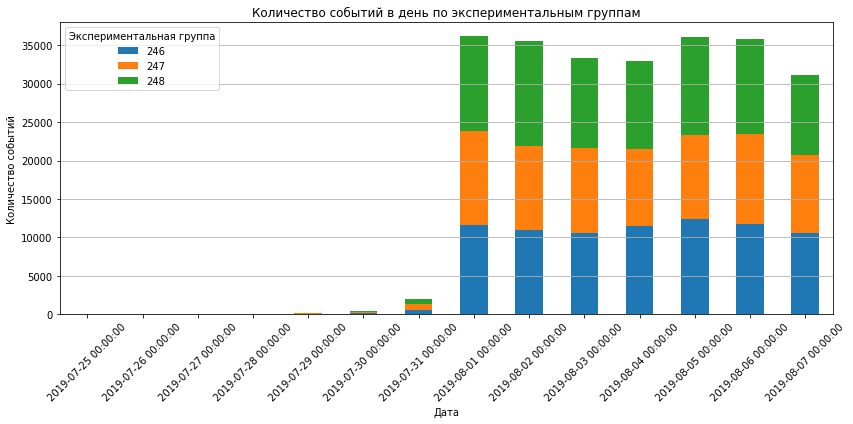

In [18]:
# Группировка данных по дате и экспериментальной группе для подсчета событий
events_by_date_group = logs_exp.groupby(['date', 'exp_id']).size().unstack(fill_value=0)

# Построение столбчатой диаграммы
events_by_date_group.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Количество событий в день по экспериментальным группам')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.legend(title='Экспериментальная группа')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные».**

На столбчатой диаграмме отображено количество событий по датам и группам эксперимента. Из диаграммы видно, что количество событий в различные дни неоднородно. Особенно малое количество событий наблюдается в начале периода, что может указывать на неполноту данных за эти даты. С течением времени количество событий увеличивается и становится более стабильным.

**Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?**

Чтобы определить, с какого момента данные можно считать полными, стоит исключить начальный период, где наблюдается значительное колебание в количестве событий. Основываясь на визуализации, полными данные могут считаться начиная примерно с 1 августа 2019 года, когда количество событий стабилизируется и сохраняется на одном уровне во всех группах.

Анализ количества событий по датам показывает, что существенное увеличение количества событий происходит с 1 августа 2019 года. До этого дня количество событий нарастает, но остаётся относительно низким, что указывает на возможную неполноту данных. С 1 августа количество событий в день стабилизируется на уровне более 30 тысяч, что позволяет сделать вывод о том, что данные за период с 1 по 7 августа 2019 года можно считать полными и представительными для анализа.

Таким образом, реально доступными для анализа данными являются записи за период с 1 по 7 августа 2019 года. 

In [19]:
# Фильтрация данных, начиная с 1 августа 2019 года
filtered_logs = logs_exp[logs_exp['date'] >= pd.to_datetime('2019-08-01')]
filtered_logs

,event_name,user_id,event_timestamp,exp_id,datetime,date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


**Много ли событий и пользователей вы потеряли, отбросив старые данные?**

In [20]:
# Подсчет потерянных событий и пользователей после фильтрации
lost_events = total_events - filtered_logs.shape[0]
lost_users = unique_users - filtered_logs['user_id'].nunique()

print(lost_events)
print(lost_users)

2826
17


После исключения данных до 1 августа 2019 года было потеряно 2 828 событий, что составляет менее 1.2% от общего числа событий. Количество уникальных пользователей сократилось с 7 551 до 7 534, что указывает на утрату 17 пользователей. Эти потери незначительны по сравнению с общим объемом данных, что свидетельствует о том, что основная часть данных остается неизменной и пригодна для анализа.

**Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.**

In [21]:
# Проверка наличия пользователей из всех трех экспериментальных групп
users_in_groups = filtered_logs.groupby('exp_id')['user_id'].nunique()

users_in_groups

exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

В отфильтрованных данных также присутствуют пользователи из всех трех экспериментальных групп (246, 247 и 248), что обеспечивает возможность проведения корректного анализа в разрезе экспериментальных групп.

**Промежуточный Вывод:**

1. Данные охватывают период с 25 июля 2019 года по 7 августа 2019 года.
2. После анализа количества событий по датам и группам эксперимента выявлена неравномерность данных в начале периода, что может свидетельствовать о неполноте данных.
3. Определено, что начиная с 1 августа 2019 года данные становятся более стабильными и полными.
4. После фильтрации данных до 1 августа было потеряно незначительное количество событий (менее 1.2%) и пользователей (17), что несущественно для анализа.
5. Проверка показала, что в отфильтрованных данных присутствуют пользователи из всех трех экспериментальных групп, что важно для корректного анализа результатов эксперимента.
6. Таким образом, я могу продолжать анализировать данные, начиная с 1 августа 2019 года, с уверенностью в их полноте и репрезентативности.

<hr style="border: 1px solid black;">

# **Шаг 4. Изучите воронку событий**

**Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.**

In [22]:
# Подсчет частоты событий в логах
event_frequency = filtered_logs['event_name'].value_counts().sort_values(ascending=False)
event_frequency

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

После анализа логов обнаружены следующие события и их частота встречаемости (отсортированы по убыванию):

1. MainScreenAppear (Отображение главного экрана) - 117 328 раз
2. OffersScreenAppear (Отображение экрана предложений) - 46 333 раза
3. CartScreenAppear (Отображение экрана корзины) - 42 303 раза
4. PaymentScreenSuccessful (Успешное отображение экрана оплаты) - 33 918 раз
5. Tutorial (Обучение) - 1 005 раз

**Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.**

In [23]:
# Подсчет количества уникальных пользователей для каждого события
users_per_event = filtered_logs.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)

# Общее количество уникальных пользователей в отфильтрованных данных
total_filtered_users = filtered_logs['user_id'].nunique()

# Расчет доли пользователей, которые хоть раз совершали событие
users_per_event_percentage = (users_per_event / total_filtered_users).map(lambda x: f"{x:.2%}")

# Соединение результатов в один DataFrame для удобства представления
event_user_statistics = pd.DataFrame({
    'Users': users_per_event,
    'Percentage': users_per_event_percentage
})

event_user_statistics

,Users,Percentage
event_name,,
MainScreenAppear,7419,98.47%
OffersScreenAppear,4593,60.96%
CartScreenAppear,3734,49.56%
PaymentScreenSuccessful,3539,46.97%
Tutorial,840,11.15%


После анализа логов было рассчитано количество пользователей, совершивших каждое из указанных событий, и их доля от общего числа пользователей:

1. MainScreenAppear (Отображение главного экрана) - 7 419 пользователей, доля 98.47%
2. OffersScreenAppear (Отображение экрана предложений) - 4 593 пользователя, доля 60.96%
3. CartScreenAppear (Отображение экрана корзины) - 3 734 пользователя, доля 49.56%
4. PaymentScreenSuccessful (Успешное отображение экрана оплаты) - 3 539 пользователей, доля 46.97%
5. Tutorial (Обучение) - 840 пользователей, доля 11.15%

Эти данные позволяют понять, какие этапы взаимодействия с приложением наиболее популярны среди пользователей, а также определить, насколько успешными являются конверсии на различных этапах пользовательского пути. Например, большинство пользователей (почти 99%) видели главный экран, но менее половины пользователей переходили на экран оплаты.

**Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.**

Исходя из названий и частоты событий, можно предположить следующий порядок взаимодействия пользователя с приложением, который выстраивается в типичную воронку продаж:

1. **MainScreenAppear (Появление главного экрана)**: Пользователь запускает приложение и видит главный экран. Это начальная точка для большинства сценариев использования приложения.
2. **OffersScreenAppear (Появление экрана предложений)**: После того как пользователь ознакомится с главным экраном, он может перейти к просмотру предложений. Этот шаг может включать в себя выбор конкретных товаров или услуг.
3. **CartScreenAppear (Появление экрана корзины)**: Пользователь, заинтересованный в покупке, добавляет товары в корзину и переходит к её просмотру.
4. **PaymentScreenSuccessful (Успешная оплата)**: Последний шаг в воронке продаж – успешная оплата выбранных товаров или услуг, что означает завершение транзакции.

**Tutorial (Обучение)** не вписывается напрямую в эту цепочку, так как это событие может происходить в любой момент взаимодействия с приложением. Обучение может быть как вступительным, так и вызванным из какого-либо меню помощи в приложении. Пользователи могут пропустить этот шаг или вернуться к нему после изучения приложения. Следовательно, его не стоит учитывать при расчёте воронки, так как это не обязательный шаг для совершения покупки и может не отражать намерения пользователя совершить покупку.

Таким образом, основные этапы воронки (за исключением обучения) выстраиваются в последовательную цепочку, отражающую путь пользователя от первого взаимодействия с приложением до совершения покупки.

**По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.**

In [24]:
# Создаем список событий в порядке воронки продаж, исключая Tutorial
funnel_events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Фильтрация пользователей по событиям воронки
users_at_steps = {event: filtered_logs[filtered_logs['event_name'] == event]['user_id'].nunique() for event in funnel_events}

# Расчет доли пользователей, проходящих на следующий шаг воронки
conversion_rates = {}
for i in range(len(funnel_events) - 1):
    current_step_user_count = users_at_steps[funnel_events[i]]
    next_step_user_count = users_at_steps[funnel_events[i + 1]]
    conversion_rate = next_step_user_count / current_step_user_count
    conversion_rates[f"{funnel_events[i]} → {funnel_events[i + 1]}"] = conversion_rate

# Переводим в DataFrame для наглядности
conversion_df = pd.DataFrame(list(conversion_rates.items()), columns=['Step Transition', 'Conversion Rate'])
conversion_df['Conversion Rate'] = conversion_df['Conversion Rate'].map(lambda x: f"{x:.2%}")

conversion_df

,Step Transition,Conversion Rate
0,MainScreenAppear → OffersScreenAppear,61.91%
1,OffersScreenAppear → CartScreenAppear,81.30%
2,CartScreenAppear → PaymentScreenSuccessful,94.78%


Рассчитаны доли пользователей, проходящих на следующий шаг воронки событий:

1. От главного экрана (MainScreenAppear) к экрану предложений (OffersScreenAppear): 61.91% пользователей переходят на экран предложений.
2. От экрана предложений (OffersScreenAppear) к экрану корзины (CartScreenAppear): 81.30% пользователей переходят на экран корзины.
3. От экрана корзины (CartScreenAppear) к успешной оплате (PaymentScreenSuccessful): 94.78% пользователей успешно завершают оплату после добавления товаров в корзину.

**На каком шаге теряете больше всего пользователей?**

Чтобы определить, где теряется больше всего пользователей, нужно найти наименьший конверсионный коэффициент. Судя по предоставленным данным, наименьший конверсионный коэффициент у первого перехода (от главного экрана к экрану предложений) - 0.6191. Следовательно, больше всего пользователей теряется при переходе от главного экрана к экрану предложений.

**Какая доля пользователей доходит от первого события до оплаты?**

In [25]:
# Вычисление доли пользователей, доходящих от первого события до оплаты
first_event_users = users_at_steps['MainScreenAppear']
last_event_users = users_at_steps['PaymentScreenSuccessful']
overall_conversion_rate = last_event_users / first_event_users

f"{overall_conversion_rate:.2%}"

'47.70%'

Доля пользователей, доходящих от первого события (главного экрана) до оплаты, составляет примерно 47.70%. Это означает, что менее половины пользователей, начавших с главного экрана, доходят до успешной оплаты.

**Промежуточный Вывод:**

1. **Порядок событий:** Исходя из анализа, можно предположить, что основные этапы взаимодействия пользователя с приложением следуют в порядке: MainScreenAppear (главный экран) → OffersScreenAppear (экран предложений) → CartScreenAppear (экран корзины) → PaymentScreenSuccessful (успешная оплата). Однако, Tutorial (обучение) не вписывается напрямую в эту последовательность, так как его событие может происходить в любой момент взаимодействия с приложением.

2. **Воронка продаж:** Анализ воронки продаж позволил выявить, что наибольшее количество пользователей теряется на первом переходе от главного экрана к экрану предложений, где конверсионный коэффициент составляет 61.91%. Затем конверсионные коэффициенты возрастают на последующих этапах, достигая 94.78% при переходе от экрана корзины к успешной оплате.

3. **Доля пользователей до оплаты:** Приблизительно 47.70% пользователей, начавших взаимодействие с главного экрана, доходят до успешной оплаты. Это говорит о том, что менее половины пользователей завершают покупку после посещения главного экрана.

<hr style="border: 1px solid black;">

# **Шаг 5. Изучите результаты эксперимента**

Изменение числовых идентификаторов экспериментальных групп на буквенные в копии DataFrame и последующее разделение данных по группам A и B облегчает анализ и интерпретацию результатов эксперимента.

In [26]:
# Создаем копию DataFrame, чтобы изменения не затрагивали оригинальные данные
filtered_logs_copy = filtered_logs.copy()

# Заменяем числовые идентификаторы экспериментальных групп на буквенные обозначения для более понятного анализа
exp_id_replacements = {246: 'A', 247: 'B', 248: 'C'}
filtered_logs_copy['exp_id'] = filtered_logs_copy['exp_id'].replace(exp_id_replacements)

# Разделяем данные по экспериментальным группам для дальнейшего анализа
A = filtered_logs_copy[filtered_logs_copy['exp_id'] == 'A']
B = filtered_logs_copy[filtered_logs_copy['exp_id'] == 'B']
C = filtered_logs_copy[filtered_logs_copy['exp_id'] == 'C']
D = filtered_logs_copy[filtered_logs_copy['exp_id'] == 'C']

**Сколько пользователей в каждой экспериментальной группе?**

In [27]:
# Подсчет количества уникальных пользователей в каждой экспериментальной группе
total_unique_users = filtered_logs_copy.groupby('exp_id')['user_id'].nunique()
display(total_unique_users)

exp_id
A    2484
B    2513
C    2537
Name: user_id, dtype: int64

В экспериментальной группе A находится 2484 уникальных пользователя, в группе B - 2513 уникальных пользователей, и в группе C - 2537 уникальных пользователей.

**Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.**

In [28]:
def z_test_for_events(events_list, group1, group2, total_users, alpha=0.01):
    for event in events_list:
        # Расчет количества уникальных пользователей для каждого события в каждой группе
        event_users_group1 = group1[group1['event_name'] == event]['user_id'].nunique()
        event_users_group2 = group2[group2['event_name'] == event]['user_id'].nunique()
        
        # Общее количество пользователей в каждой группе
        total_users_group1 = total_users.get('A', 0) 
        total_users_group2 = total_users.get('B', 0)
        
        # Подготовка данных для Z-теста
        counts = np.array([event_users_group1, event_users_group2])
        nobs = np.array([total_users_group1, total_users_group2])
        
        # Выполнение Z-теста
        stat, pval = proportions_ztest(counts, nobs)
        
        # Вывод результата с указанным уровнем значимости
        print(f"Событие: {event}, p-значение: {pval:.2f}")
        if pval < alpha:
            print("  Отклоняем нулевую гипотезу: есть значительная разница между долями.")
        else:
            print("  Не отклоняем нулевую гипотезу: нет значительной разницы между долями.")
        print("")  

In [29]:
events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

Общая формулировка гипотез:
- Нулевая гипотеза (H₀): Между долями события в группах A и B нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах A и B есть статистически значимая разница.

In [30]:
z_test_for_events(events, A, B, total_unique_users, alpha=0.01)

Событие: MainScreenAppear, p-значение: 0.76
  Не отклоняем нулевую гипотезу: нет значительной разницы между долями.

Событие: OffersScreenAppear, p-значение: 0.25
  Не отклоняем нулевую гипотезу: нет значительной разницы между долями.

Событие: CartScreenAppear, p-значение: 0.23
  Не отклоняем нулевую гипотезу: нет значительной разницы между долями.

Событие: PaymentScreenSuccessful, p-значение: 0.11
  Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



На основе результатов А/А-эксперимента и использования Z-теста для сравнения двух контрольных групп A и B по четырем событиям (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful), видно, что p-значения для каждого события выше установленного порога альфа (0.01). Это означает, что статистически значимой разницы между долями пользователей, совершивших эти события в двух группах, нет. 

Полученные результаты свидетельствуют о корректности механизмов и расчетов, используемых в эксперименте, поскольку они не обнаружили значимой разницы между контрольными группами. Это указывает на то, что система сплитования работает правильно и не вносит искажений в распределение пользователей по группам.

**Выберите самое популярное событие.**

In [31]:
# Создание сводной таблицы для сравнения активности пользователей в группах 'A', 'B', и 'C'
groups = filtered_logs_copy[filtered_logs_copy['exp_id'].isin(['A', 'B', 'C'])] \
    .pivot_table(index='event_name', 
                 columns='exp_id', 
                 values='user_id', 
                 aggfunc=pd.Series.nunique) \
    .sort_values('A', ascending=False)

# Исключение события 'Tutorial' из анализа, если оно не несет ценности для исследования
groups.drop(['Tutorial'], inplace=True)

# Вывод обновленной сводной таблицы для наглядного сравнения активности пользователей в группах 'A', 'B', и 'C'
display(groups)

exp_id,A,B,C
event_name,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181


Самое популярное событие среди пользователей групп 'A', 'B', и 'C' — это "MainScreenAppear". Количество уникальных пользователей для этого события составило 2450 в группе 'A', 2476 в группе 'B', и 2493 в группе 'C'.

**Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие.**

In [32]:
# Расчет общего количества уникальных пользователей в контрольных группах 'A' и 'B' для всех событий
total_users_per_control_group = filtered_logs_copy[filtered_logs_copy['exp_id'].isin(['A', 'B'])].groupby('exp_id')['user_id'].nunique()

# Создание сводной таблицы для контрольных групп 'A' и 'B' для события "MainScreenAppear"
control_groups = filtered_logs_copy[filtered_logs_copy['exp_id'].isin(['A', 'B']) & (filtered_logs_copy['event_name'] == 'MainScreenAppear')] \
    .pivot_table(index='event_name', 
                 columns='exp_id', 
                 values='user_id', 
                 aggfunc=pd.Series.nunique) \
    .sort_values('A', ascending=False)

# Создание нового DataFrame для обновленных контрольных групп с долями пользователей для события "MainScreenAppear"
updated_control_groups = pd.DataFrame(index=control_groups.index)

# Добавление столбцов с количеством пользователей и долями для контрольных групп 'A' и 'B' для события "MainScreenAppear"
for exp_id in ['A', 'B']:
    updated_control_groups[f'users_{exp_id}'] = control_groups[exp_id]  # Столбец с количеством пользователей
    updated_control_groups[f'proportion_{exp_id}'] = (control_groups[exp_id] / total_users_per_control_group[exp_id]).map("{:.2%}".format)  # Столбец с долями, отформатированными в процентах

# Вывод обновленной сводной таблицы для события "MainScreenAppear"
display(updated_control_groups)

,users_A,proportion_A,users_B,proportion_B
event_name,,,,
MainScreenAppear,2450,98.63%,2476,98.53%


Для события "MainScreenAppear", которое является самым популярным событием среди пользователей контрольных групп 'A' и 'B', численность и доля пользователей, совершивших это событие, представлены следующим образом:

- В группе 'A': 2450 пользователей, что составляет 98.63% от общего числа пользователей в группе.
- В группе 'B': 2476 пользователей, что составляет 98.53% от общего числа пользователей в группе.

**Проверьте, будет ли отличие между группами статистически достоверным.**

Общая формулировка гипотез:

- Нулевая гипотеза (H₀): Между долями события в группах A и B нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах A и B есть статистически значимая разница.

In [33]:
def z_test_for_proportions(event_users_group1, event_users_group2, total_users_group1, total_users_group2, alpha=0.01):
    # Подготовка данных для Z-теста
    counts = np.array([event_users_group1, event_users_group2])
    nobs = np.array([total_users_group1, total_users_group2])

    # Выполнение Z-теста
    stat, pval = proportions_ztest(counts, nobs)

    # Вывод результата с указанным уровнем значимости
    print(f"p-значение: {pval:.2f}")
    if pval < alpha:
        print("Отклоняем нулевую гипотезу: есть значительная разница между долями.")
    else:
        print("Не отклоняем нулевую гипотезу: нет значительной разницы между долями.")
    print("")

# Получение количества пользователей в группах 'A' и 'B' для события "MainScreenAppear"
event_users_group_A = updated_control_groups.loc['MainScreenAppear', 'users_A']
event_users_group_B = updated_control_groups.loc['MainScreenAppear', 'users_B']

# Получение общего количества пользователей в группах 'A' и 'B'
total_users_group_A = total_users_per_control_group['A']
total_users_group_B = total_users_per_control_group['B']

# Выполнение Z-теста для сравнения долей пользователей между группами 'A' и 'B'
z_test_for_proportions(event_users_group_A, event_users_group_B, total_users_group_A, total_users_group_B, alpha=0.01)

p-значение: 0.76
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Поскольку p-значение равно 0.76 и больше уровня значимости alpha (0.01), мы не отклоняем нулевую гипотезу о том, что нет значительной разницы между долями уникальных пользователей в группах. Это означает, что статистические данные не подтверждают наличие значимой разницы между группами.

**Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?**

Общая формулировка гипотез:

- Нулевая гипотеза (H₀): Между долями события в группах A и B нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах A и B есть статистически значимая разница.

In [34]:
def analyze_events(filtered_logs_copy, total_users_per_control_group, event_names, group_A, group_B, alpha=0.05):
    # Проход по каждому событию
    for event_name in event_names:
        # Создание сводной таблицы для события и контрольных групп
        control_groups = filtered_logs_copy[(filtered_logs_copy['exp_id'].isin([group_A, group_B])) & (filtered_logs_copy['event_name'] == event_name)] \
            .pivot_table(index='event_name', 
                         columns='exp_id', 
                         values='user_id', 
                         aggfunc=pd.Series.nunique) \
            .sort_values(group_A, ascending=False)
        
        # Обновление данных контрольных групп
        updated_control_groups = pd.DataFrame(index=control_groups.index)
        
        # Заполнение таблицы данными по контрольным группам
        for exp_id in [group_A, group_B]:
            updated_control_groups[f'users_{exp_id}'] = control_groups[exp_id]
            updated_control_groups[f'proportion_{exp_id}'] = (control_groups[exp_id] / total_users_per_control_group[exp_id]).map("{:.2%}".format)
        
        # Вывод информации о событии и контрольных группах
        print(f"Анализ для события: {event_name}")
        display(updated_control_groups)
        
        # Получение данных для z-теста
        event_users_group_A = updated_control_groups.loc[event_name, f'users_{group_A}']
        event_users_group_B = updated_control_groups.loc[event_name, f'users_{group_B}']
        total_users_group_A = total_users_per_control_group[group_A]
        total_users_group_B = total_users_per_control_group[group_B]
        
        # Выполнение z-теста и вывод результатов
        print(f"Z-тест для долей между группами '{group_A}' и '{group_B}' при alpha={alpha}:")
        z_test_for_proportions(event_users_group_A, event_users_group_B, total_users_group_A, total_users_group_B, alpha)
        print("\n")

# Вызов функции для анализа всех четырех событий
event_names_to_analyze = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
group_A = 'A'
group_B = 'B'
alpha_level = 0.05
analyze_events(filtered_logs_copy, total_users_per_control_group, event_names_to_analyze, group_A, group_B, alpha_level)

Анализ для события: MainScreenAppear


,users_A,proportion_A,users_B,proportion_B
event_name,,,,
MainScreenAppear,2450,98.63%,2476,98.53%


Z-тест для долей между группами 'A' и 'B' при alpha=0.05:
p-значение: 0.76
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: OffersScreenAppear


,users_A,proportion_A,users_B,proportion_B
event_name,,,,
OffersScreenAppear,1542,62.08%,1520,60.49%


Z-тест для долей между группами 'A' и 'B' при alpha=0.05:
p-значение: 0.25
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: CartScreenAppear


,users_A,proportion_A,users_B,proportion_B
event_name,,,,
CartScreenAppear,1266,50.97%,1238,49.26%


Z-тест для долей между группами 'A' и 'B' при alpha=0.05:
p-значение: 0.23
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: PaymentScreenSuccessful


,users_A,proportion_A,users_B,proportion_B
event_name,,,,
PaymentScreenSuccessful,1200,48.31%,1158,46.08%


Z-тест для долей между группами 'A' и 'B' при alpha=0.05:
p-значение: 0.11
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.





На основе результатов анализа каждого события можно сделать вывод о корректности разбиения на группы. Если для всех событий не отклоняется нулевая гипотеза о статистически незначимой разнице между группами, это может указывать на то, что разбиение на группы работает корректно.

**Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию.**

In [35]:
# Добавляем информацию о группе D, которая является суммой групп A и B
total_unique_users['D'] = total_unique_users['A'] + total_unique_users['B']

# Выводим обновленные данные
total_unique_users

exp_id
A    2484
B    2513
C    2537
D    4997
Name: user_id, dtype: int64

In [36]:
# Исключение события 'Tutorial' из данных
filtered_logs_no_tutorial = filtered_logs_copy[~filtered_logs_copy['event_name'].eq('Tutorial')]

# Расчет общего количества уникальных пользователей в контрольных группах 'A', 'B', 'C', исключая событие 'Tutorial'
total_users_per_control_group_no_tutorial = filtered_logs_no_tutorial[filtered_logs_no_tutorial['exp_id'].isin(['A', 'B', 'C'])].groupby('exp_id')['user_id'].nunique()

# Создание сводной таблицы для контрольных групп 'A', 'B', 'C', исключая событие 'Tutorial'
control_groups_no_tutorial = filtered_logs_no_tutorial[filtered_logs_no_tutorial['exp_id'].isin(['A', 'B', 'C'])] \
    .pivot_table(index='event_name', 
                 columns='exp_id', 
                 values='user_id', 
                 aggfunc='nunique') \
    .sort_values('A', ascending=False)

# Создание нового DataFrame для обновленных контрольных групп без события 'Tutorial' с долями пользователей для всех событий
updated_control_groups_no_tutorial = pd.DataFrame(index=control_groups_no_tutorial.index)

# Добавление столбцов с количеством пользователей и долями для контрольных групп 'A', 'B', 'C', исключая событие 'Tutorial'
for exp_id in ['A', 'B', 'C']:
    updated_control_groups_no_tutorial[f'users_{exp_id}'] = control_groups_no_tutorial[exp_id]  # Столбец с количеством пользователей
    updated_control_groups_no_tutorial[f'proportion_{exp_id}'] = (control_groups_no_tutorial[exp_id] / total_users_per_control_group_no_tutorial[exp_id]).map("{:.2%}".format)  # Столбец с долями, отформатированными в процентах

display(updated_control_groups_no_tutorial)

,users_A,proportion_A,users_B,proportion_B,users_C,proportion_C
event_name,,,,,,
MainScreenAppear,2450,98.67%,2476,98.57%,2493,98.34%
OffersScreenAppear,1542,62.10%,1520,60.51%,1531,60.39%
CartScreenAppear,1266,50.99%,1238,49.28%,1230,48.52%
PaymentScreenSuccessful,1200,48.33%,1158,46.10%,1181,46.59%


Этот блок данных представляет собой сравнение трех различных групп пользователей (группы A, B и C) по нескольким событиям. Для каждого события приведены количество пользователей и их доля от общего числа пользователей в каждой группе.

Из этой таблицы можно сделать следующие выводы:

1. **MainScreenAppear (Отображение главного экрана):**
   - В группе A отсутствует сильное преимущество перед группами B и C. Доля пользователей в группе A составляет 98.67%, в группе B - 98.57%, а в группе C - 98.34%. Различия между долями пользователей в группах незначительны.

2. **OffersScreenAppear (Отображение экрана предложений):**
   - Доля пользователей в группе A составляет 62.10%, в группе B - 60.51%, а в группе C - 60.39%. Похоже, что доля пользователей в группе A немного выше, чем в группах B и C, но различия между группами также не значительны.

3. **CartScreenAppear (Отображение экрана корзины):**
   - Доля пользователей в группе A составляет 50.99%, в группе B - 49.28%, а в группе C - 48.52%. В этом случае также видно незначительное преимущество группы A перед группами B и C.

4. **PaymentScreenSuccessful (Успешное отображение экрана оплаты):**
   - Доля пользователей в группе A составляет 48.33%, в группе B - 46.10%, а в группе C - 46.59%. Группа A имеет незначительное преимущество перед группами B и C в этом событии.

В целом, хотя некоторые различия между группами могут быть замечены, они не выглядят статистически значимыми. Вероятно, что разбиение на группы работает достаточно корректно, но для более точного вывода необходимо провести статистические тесты на значимость различий между группами.

Общая формулировка гипотез:

- Нулевая гипотеза (H₀): Между долями события в группах A и C нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах A и C есть статистически значимая разница.

Общая формулировка гипотез:

- Нулевая гипотеза (H₀): Между долями события в группах B и C нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах B и C есть статистически значимая разница.

In [37]:
def analyze_events(filtered_logs_copy, total_users_per_control_group, event_names, group_1, group_2, alpha=0.05):
    """
    Функция для анализа событий между двумя группами.

    Параметры:
        filtered_logs_copy (DataFrame): Отфильтрованные логи.
        total_users_per_control_group (Series): Общее количество пользователей в каждой контрольной группе.
        event_names (list): Список имен событий для анализа.
        group_1 (str): Идентификатор первой контрольной группы.
        group_2 (str): Идентификатор второй контрольной группы.
        alpha (float): Уровень значимости для статистического теста (по умолчанию 0.05).
    """
    for event_name in event_names:
        control_groups = filtered_logs_copy[(filtered_logs_copy['exp_id'].isin([group_1, group_2])) & (filtered_logs_copy['event_name'] == event_name)] \
            .pivot_table(index='event_name', 
                         columns='exp_id', 
                         values='user_id', 
                         aggfunc=pd.Series.nunique) \
            .sort_values(group_1, ascending=False)
        
        updated_control_groups = pd.DataFrame(index=control_groups.index)
        
        for exp_id in [group_1, group_2]:
            updated_control_groups[f'users_{exp_id}'] = control_groups[exp_id]
            updated_control_groups[f'proportion_{exp_id}'] = (control_groups[exp_id] / total_users_per_control_group[exp_id]).map("{:.2%}".format)
        
        print(f"Анализ для события: {event_name}")
        display(updated_control_groups)
        
        event_users_group_1 = updated_control_groups.loc[event_name, f'users_{group_1}']
        event_users_group_2 = updated_control_groups.loc[event_name, f'users_{group_2}']
        total_users_group_1 = total_users_per_control_group[group_1]
        total_users_group_2 = total_users_per_control_group[group_2]
        
        print(f"Z-тест для долей между группами '{group_1}' и '{group_2}' при alpha={alpha}:")
        z_test_for_proportions(event_users_group_1, event_users_group_2, total_users_group_1, total_users_group_2, alpha)
        print("\n")

# Вызов функции для анализа всех четырех событий
event_names_to_analyze = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
group_A = 'A'
group_B = 'B'
group_C = 'C'
alpha_level = 0.05

# Анализ между группами A и C
print('Анализ между группами A и C:')
analyze_events(filtered_logs_copy, total_users_per_control_group_no_tutorial, event_names_to_analyze, group_A, group_C, alpha_level)

# Анализ между группами B и C
print('Анализ между группами B и C:')
analyze_events(filtered_logs_copy, total_users_per_control_group_no_tutorial, event_names_to_analyze, group_B, group_C, alpha_level)

Анализ между группами A и C:
Анализ для события: MainScreenAppear


,users_A,proportion_A,users_C,proportion_C
event_name,,,,
MainScreenAppear,2450,98.67%,2493,98.34%


Z-тест для долей между группами 'A' и 'C' при alpha=0.05:
p-значение: 0.34
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: OffersScreenAppear


,users_A,proportion_A,users_C,proportion_C
event_name,,,,
OffersScreenAppear,1542,62.10%,1531,60.39%


Z-тест для долей между группами 'A' и 'C' при alpha=0.05:
p-значение: 0.21
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: CartScreenAppear


,users_A,proportion_A,users_C,proportion_C
event_name,,,,
CartScreenAppear,1266,50.99%,1230,48.52%


Z-тест для долей между группами 'A' и 'C' при alpha=0.05:
p-значение: 0.08
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: PaymentScreenSuccessful


,users_A,proportion_A,users_C,proportion_C
event_name,,,,
PaymentScreenSuccessful,1200,48.33%,1181,46.59%


Z-тест для долей между группами 'A' и 'C' при alpha=0.05:
p-значение: 0.22
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ между группами B и C:
Анализ для события: MainScreenAppear


,users_B,proportion_B,users_C,proportion_C
event_name,,,,
MainScreenAppear,2476,98.57%,2493,98.34%


Z-тест для долей между группами 'B' и 'C' при alpha=0.05:
p-значение: 0.52
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: OffersScreenAppear


,users_B,proportion_B,users_C,proportion_C
event_name,,,,
OffersScreenAppear,1520,60.51%,1531,60.39%


Z-тест для долей между группами 'B' и 'C' при alpha=0.05:
p-значение: 0.93
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: CartScreenAppear


,users_B,proportion_B,users_C,proportion_C
event_name,,,,
CartScreenAppear,1238,49.28%,1230,48.52%


Z-тест для долей между группами 'B' и 'C' при alpha=0.05:
p-значение: 0.59
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: PaymentScreenSuccessful


,users_B,proportion_B,users_C,proportion_C
event_name,,,,
PaymentScreenSuccessful,1158,46.10%,1181,46.59%


Z-тест для долей между группами 'B' и 'C' при alpha=0.05:
p-значение: 0.73
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.





Исходя из результатов Z-теста для сравнения долей между группами A, B и C, можно сказать, что разбиение на группы работает корректно. Во всех анализируемых событиях (MainScreenAppear, OffersScreenAppear, CartScreenAppear и PaymentScreenSuccessful) не удалось обнаружить статистически значимых различий между долями пользователей в различных группах. Таким образом, нет оснований для предположения о том, что разбиение на группы не является случайным или неправильным.

**Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?**

In [38]:
# Исключение события 'Tutorial' из данных
filtered_logs_no_tutorial = filtered_logs_copy[~filtered_logs_copy['event_name'].eq('Tutorial')]

# Расчет общего количества уникальных пользователей в контрольных группах 'A', 'B', 'C', исключая событие 'Tutorial'
total_users_per_control_group_no_tutorial = filtered_logs_no_tutorial[filtered_logs_no_tutorial['exp_id'].isin(['A', 'B', 'C'])].groupby('exp_id')['user_id'].nunique()

# Создание сводной таблицы для контрольных групп 'A', 'B', 'C', исключая событие 'Tutorial'
control_groups_no_tutorial = filtered_logs_no_tutorial[filtered_logs_no_tutorial['exp_id'].isin(['A', 'B', 'C'])] \
    .pivot_table(index='event_name', 
                 columns='exp_id', 
                 values='user_id', 
                 aggfunc='nunique') \
    .sort_values('A', ascending=False)

# Создание нового DataFrame для обновленных контрольных групп без события 'Tutorial' с долями пользователей для всех событий
updated_control_groups_no_tutorial = pd.DataFrame(index=control_groups_no_tutorial.index)

# Добавление столбцов с количеством пользователей и долями для контрольных групп 'A', 'B', 'C', исключая событие 'Tutorial'
for exp_id in ['A', 'B','C']:
    updated_control_groups_no_tutorial[f'users_{exp_id}'] = control_groups_no_tutorial[exp_id]  # Столбец с количеством пользователей
    updated_control_groups_no_tutorial[f'proportion_{exp_id}'] = (control_groups_no_tutorial[exp_id] / total_users_per_control_group_no_tutorial[exp_id]).map("{:.2%}".format)  # Столбец с долями, отформатированными в процентах

# Добавление нового столбца для группы 'D' как суммы 'A' и 'B'
updated_control_groups_no_tutorial['users_D'] = updated_control_groups_no_tutorial['users_A'] + updated_control_groups_no_tutorial['users_B']

# Расчет общего количества пользователей в 'A' и 'B' вместе, исключая 'Tutorial'
total_users_AB_combined = total_users_per_control_group_no_tutorial['A'] + total_users_per_control_group_no_tutorial['B']

# Добавление столбца долей для 'D'
updated_control_groups_no_tutorial['proportion_D'] = (updated_control_groups_no_tutorial['users_D'] / total_users_AB_combined).map("{:.2%}".format)

display(updated_control_groups_no_tutorial)

,users_A,proportion_A,users_B,proportion_B,users_C,proportion_C,users_D,proportion_D
event_name,,,,,,,,
MainScreenAppear,2450,98.67%,2476,98.57%,2493,98.34%,4926,98.62%
OffersScreenAppear,1542,62.10%,1520,60.51%,1531,60.39%,3062,61.30%
CartScreenAppear,1266,50.99%,1238,49.28%,1230,48.52%,2504,50.13%
PaymentScreenSuccessful,1200,48.33%,1158,46.10%,1181,46.59%,2358,47.21%


Общая формулировка гипотез:

- Нулевая гипотеза (H₀): Между долями события в группах C и D нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах C и D есть статистически значимая разница.

In [39]:
# Correct calculation of total users in group 'C' and 'D' (combined 'A' + 'B')
users_C = updated_control_groups_no_tutorial.loc['MainScreenAppear', 'users_C']
total_C = total_users_per_control_group_no_tutorial['C']  # Total number of users in group 'C'
users_D = updated_control_groups_no_tutorial.loc['MainScreenAppear', 'users_D']
total_D = total_users_AB_combined  # Total number of users in combined groups 'A' and 'B'

# Perform Z-test for 'MainScreenAppear' event
z_score, p_value = proportions_ztest([users_C, users_D], [total_C, total_D])

# Define the function to analyze all four events
def analyze_events(df, total_users_per_group, event_names, group1, group2, alpha):
    results = []
    for event in event_names:
        users_group1 = df.loc[event, f'users_{group1}']
        users_group2 = df.loc[event, f'users_{group2}']
        total_group1 = total_users_per_group[group1]
        total_group2 = total_users_per_group[group2]
        
        z_score, p_value = proportions_ztest([users_group1, users_group2], [total_group1, total_group2])
        
        display(f"Event: {event}, Z-score: {z_score}, P-value: {p_value}")
        results.append((event, z_score, p_value, p_value < alpha))
    
    return pd.DataFrame(results, columns=['Event', 'Z-score', 'P-value', 'Significant'])

# Call the function for analysis
event_names_to_analyze = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
group_C = 'C'
group_D = 'D'
alpha_level = 0.05

# Assuming 'filtered_logs_no_tutorial' is your updated DataFrame excluding 'Tutorial' events
# and 'total_users_per_control_group' is a Series or dict with totals for each group
analyze_events(updated_control_groups_no_tutorial, total_users_per_control_group_no_tutorial, event_names_to_analyze, group_A, group_B, alpha_level)

'Event: MainScreenAppear, Z-score: 0.31512026353759287, P-value: 0.7526703436483039'

'Event: OffersScreenAppear, Z-score: 1.155560508362548, P-value: 0.24786096925282275'

'Event: CartScreenAppear, Z-score: 1.203775303516804, P-value: 0.22867643757335676'

'Event: PaymentScreenSuccessful, Z-score: 1.578432523853264, P-value: 0.11446627829276619'

,Event,Z-score,P-value,Significant
0,MainScreenAppear,0.315120,0.752670,False
1,OffersScreenAppear,1.155561,0.247861,False
2,CartScreenAppear,1.203775,0.228676,False
3,PaymentScreenSuccessful,1.578433,0.114466,False


Результаты показывают, что ни для одного из событий не обнаружены статистически значимые различия между контрольными группами 'C' и 'D', так как все P-значения превышают уровень значимости 0.05. Это означает, что нет оснований отвергнуть нулевую гипотезу о равенстве долей пользователей, совершивших соответствующие события, между группами 'C' и 'D'.

Таким образом, на текущем этапе эксперимента не обнаружено статистически значимых различий между контрольными группами 'C' и 'D' по четырем рассматриваемым событиям.

**Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.**

**Какой уровень значимости вы выбрали при проверке статистических гипотез выше?**

В анализе сравнивались:
- Группа A с группой B
- Группа A с группой C
- Группа B с группой C
- Группа C с объединённой группой (A+B), которая рассматривается как одна группа D в этом контексте.

Для каждого из четырёх событий проводились все эти сравнения:
- MainScreenAppear
- OffersScreenAppear
- CartScreenAppear
- PaymentScreenSuccessful

Таким образом, для каждого события было выполнено 4 проверки статистических гипотез.

In [40]:
# Количество событий
events_count = 4

# Количество сравнений для каждого события
comparisons_per_event = 4

# Общее количество проверок статистических гипотез
total_hypothesis_tests = events_count * comparisons_per_event
total_hypothesis_tests

16

Всего было проведено 16 проверок статистических гипотез.

**При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить?**

При множественных проверках статистических гипотез, когда исходный уровень значимости задан как 0.1, риск ложноположительных результатов (ошибок первого рода) увеличивается с каждым дополнительным тестом. Чтобы контролировать общую вероятность ошибочного отклонения хотя бы одной верной нулевой гипотезы на всём множестве тестов (семейный уровень ошибки), используются методы коррекции, такие как поправка Бонферрони.

Поправка Бонферрони предлагает разделить исходный уровень значимости на количество проведённых тестов (N), тем самым снижая вероятность ложноположительного результата для каждого отдельного теста.

In [41]:
# Расчет скорректированного уровня значимости при альфа = 0.05
alpha_original_05 = 0.05
alpha_corrected_05 = alpha_original_05 / total_hypothesis_tests
alpha_corrected_05

0.003125

Скорректированный уровень значимости, который стоит применить при исходном уровне значимости 0.05 и проведении 16 тестов, составляет 0.003125. Это поможет контролировать общий риск ложноположительных результатов при множественных тестированиях.

**Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.**

Общая формулировка гипотез:

- Нулевая гипотеза (H₀): Между долями события в группах A и B нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах A и B есть статистически значимая разница.

In [42]:
def analyze_events(filtered_logs_copy, total_users_per_control_group, event_names, group_A, group_B, alpha=0.05):
    for event_name in event_names:
        control_groups = filtered_logs_copy[(filtered_logs_copy['exp_id'].isin([group_A, group_B])) & (filtered_logs_copy['event_name'] == event_name)] \
            .pivot_table(index='event_name', 
                         columns='exp_id', 
                         values='user_id', 
                         aggfunc=pd.Series.nunique) \
            .sort_values(group_A, ascending=False)
        
        updated_control_groups = pd.DataFrame(index=control_groups.index)
        
        for exp_id in [group_A, group_B]:
            updated_control_groups[f'users_{exp_id}'] = control_groups[exp_id]
            updated_control_groups[f'proportion_{exp_id}'] = (control_groups[exp_id] / total_users_per_control_group[exp_id]).map("{:.2%}".format)
        
        print(f"Анализ для события: {event_name}")
        display(updated_control_groups)
        
        event_users_group_A = updated_control_groups.loc[event_name, f'users_{group_A}']
        event_users_group_B = updated_control_groups.loc[event_name, f'users_{group_B}']
        total_users_group_A = total_users_per_control_group[group_A]
        total_users_group_B = total_users_per_control_group[group_B]
        
        print(f"Z-тест для долей между группами '{group_A}' и '{group_B}' при alpha={alpha}:")
        z_test_for_proportions(event_users_group_A, event_users_group_B, total_users_group_A, total_users_group_B, alpha)
        print("\n")

# Вызов функции для анализа всех четырех событий
event_names_to_analyze = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
group_A = 'A'
group_B = 'B'
alpha_level = 0.003125
analyze_events(filtered_logs_copy, total_users_per_control_group, event_names_to_analyze, group_A, group_B, alpha_level)

Анализ для события: MainScreenAppear


,users_A,proportion_A,users_B,proportion_B
event_name,,,,
MainScreenAppear,2450,98.63%,2476,98.53%


Z-тест для долей между группами 'A' и 'B' при alpha=0.003125:
p-значение: 0.76
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: OffersScreenAppear


,users_A,proportion_A,users_B,proportion_B
event_name,,,,
OffersScreenAppear,1542,62.08%,1520,60.49%


Z-тест для долей между группами 'A' и 'B' при alpha=0.003125:
p-значение: 0.25
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: CartScreenAppear


,users_A,proportion_A,users_B,proportion_B
event_name,,,,
CartScreenAppear,1266,50.97%,1238,49.26%


Z-тест для долей между группами 'A' и 'B' при alpha=0.003125:
p-значение: 0.23
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: PaymentScreenSuccessful


,users_A,proportion_A,users_B,proportion_B
event_name,,,,
PaymentScreenSuccessful,1200,48.31%,1158,46.08%


Z-тест для долей между группами 'A' и 'B' при alpha=0.003125:
p-значение: 0.11
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.





Общая формулировка гипотез:

- Нулевая гипотеза (H₀): Между долями события в группах A и C нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах A и C есть статистически значимая разница.

Общая формулировка гипотез:

- Нулевая гипотеза (H₀): Между долями события в группах B и C нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах B и C есть статистически значимая разница.

In [43]:
def analyze_events(filtered_logs_copy, total_users_per_control_group, event_names, group_1, group_2, alpha=0.05):
    for event_name in event_names:
        control_groups = filtered_logs_copy[(filtered_logs_copy['exp_id'].isin([group_1, group_2])) & (filtered_logs_copy['event_name'] == event_name)] \
            .pivot_table(index='event_name', 
                         columns='exp_id', 
                         values='user_id', 
                         aggfunc=pd.Series.nunique) \
            .sort_values(group_1, ascending=False)
        
        updated_control_groups = pd.DataFrame(index=control_groups.index)
        
        for exp_id in [group_1, group_2]:
            updated_control_groups[f'users_{exp_id}'] = control_groups[exp_id]
            updated_control_groups[f'proportion_{exp_id}'] = (control_groups[exp_id] / total_users_per_control_group[exp_id]).map("{:.2%}".format)
        
        print(f"Анализ для события: {event_name}")
        display(updated_control_groups)
        
        event_users_group_1 = updated_control_groups.loc[event_name, f'users_{group_1}']
        event_users_group_2 = updated_control_groups.loc[event_name, f'users_{group_2}']
        total_users_group_1 = total_users_per_control_group[group_1]
        total_users_group_2 = total_users_per_control_group[group_2]
        
        print(f"Z-тест для долей между группами '{group_1}' и '{group_2}' при alpha={alpha}:")
        z_test_for_proportions(event_users_group_1, event_users_group_2, total_users_group_1, total_users_group_2, alpha)
        print("\n")

# Вызов функции для анализа всех четырех событий
event_names_to_analyze = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
group_A = 'A'
group_B = 'B'
group_C = 'C'
alpha_level = 0.003125

# Анализ между группами A и C
print('Анализ между группами A и C:')
analyze_events(filtered_logs_copy, total_users_per_control_group_no_tutorial, event_names_to_analyze, group_A, group_C, alpha_level)

# Анализ между группами B и C
print('Анализ между группами B и C:')
analyze_events(filtered_logs_copy, total_users_per_control_group_no_tutorial, event_names_to_analyze, group_B, group_C, alpha_level)

Анализ между группами A и C:
Анализ для события: MainScreenAppear


,users_A,proportion_A,users_C,proportion_C
event_name,,,,
MainScreenAppear,2450,98.67%,2493,98.34%


Z-тест для долей между группами 'A' и 'C' при alpha=0.003125:
p-значение: 0.34
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: OffersScreenAppear


,users_A,proportion_A,users_C,proportion_C
event_name,,,,
OffersScreenAppear,1542,62.10%,1531,60.39%


Z-тест для долей между группами 'A' и 'C' при alpha=0.003125:
p-значение: 0.21
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: CartScreenAppear


,users_A,proportion_A,users_C,proportion_C
event_name,,,,
CartScreenAppear,1266,50.99%,1230,48.52%


Z-тест для долей между группами 'A' и 'C' при alpha=0.003125:
p-значение: 0.08
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: PaymentScreenSuccessful


,users_A,proportion_A,users_C,proportion_C
event_name,,,,
PaymentScreenSuccessful,1200,48.33%,1181,46.59%


Z-тест для долей между группами 'A' и 'C' при alpha=0.003125:
p-значение: 0.22
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ между группами B и C:
Анализ для события: MainScreenAppear


,users_B,proportion_B,users_C,proportion_C
event_name,,,,
MainScreenAppear,2476,98.57%,2493,98.34%


Z-тест для долей между группами 'B' и 'C' при alpha=0.003125:
p-значение: 0.52
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: OffersScreenAppear


,users_B,proportion_B,users_C,proportion_C
event_name,,,,
OffersScreenAppear,1520,60.51%,1531,60.39%


Z-тест для долей между группами 'B' и 'C' при alpha=0.003125:
p-значение: 0.93
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: CartScreenAppear


,users_B,proportion_B,users_C,proportion_C
event_name,,,,
CartScreenAppear,1238,49.28%,1230,48.52%


Z-тест для долей между группами 'B' и 'C' при alpha=0.003125:
p-значение: 0.59
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.



Анализ для события: PaymentScreenSuccessful


,users_B,proportion_B,users_C,proportion_C
event_name,,,,
PaymentScreenSuccessful,1158,46.10%,1181,46.59%


Z-тест для долей между группами 'B' и 'C' при alpha=0.003125:
p-значение: 0.73
Не отклоняем нулевую гипотезу: нет значительной разницы между долями.





Общая формулировка гипотез:

- Нулевая гипотеза (H₀): Между долями события в группах C и D нет статистически значимой разницы.
- Альтернативная гипотеза (H₁): Между долями события в группах C и D есть статистически значимая разница.

In [44]:
# Correct calculation of total users in group 'C' and 'D' (combined 'A' + 'B')
users_C = updated_control_groups_no_tutorial.loc['MainScreenAppear', 'users_C']
total_C = total_users_per_control_group_no_tutorial['C']  # Total number of users in group 'C'
users_D = updated_control_groups_no_tutorial.loc['MainScreenAppear', 'users_D']
total_D = total_users_AB_combined  # Total number of users in combined groups 'A' and 'B'

# Perform Z-test for 'MainScreenAppear' event
z_score, p_value = proportions_ztest([users_C, users_D], [total_C, total_D])

# Define the function to analyze all four events
def analyze_events(df, total_users_per_group, event_names, group1, group2, alpha):
    results = []
    for event in event_names:
        users_group1 = df.loc[event, f'users_{group1}']
        users_group2 = df.loc[event, f'users_{group2}']
        total_group1 = total_users_per_group[group1]
        total_group2 = total_users_per_group[group2]
        
        z_score, p_value = proportions_ztest([users_group1, users_group2], [total_group1, total_group2])
        
        display(f"Event: {event}, Z-score: {z_score}, P-value: {p_value}")
        results.append((event, z_score, p_value, p_value < alpha))
    
    return pd.DataFrame(results, columns=['Event', 'Z-score', 'P-value', 'Significant'])

# Call the function for analysis
event_names_to_analyze = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
group_C = 'C'
group_D = 'D'
alpha_level = 0.003125

# Assuming 'filtered_logs_no_tutorial' is your updated DataFrame excluding 'Tutorial' events
# and 'total_users_per_control_group' is a Series or dict with totals for each group
analyze_events(updated_control_groups_no_tutorial, total_users_per_control_group_no_tutorial, event_names_to_analyze, group_A, group_B, alpha_level)

'Event: MainScreenAppear, Z-score: 0.31512026353759287, P-value: 0.7526703436483039'

'Event: OffersScreenAppear, Z-score: 1.155560508362548, P-value: 0.24786096925282275'

'Event: CartScreenAppear, Z-score: 1.203775303516804, P-value: 0.22867643757335676'

'Event: PaymentScreenSuccessful, Z-score: 1.578432523853264, P-value: 0.11446627829276619'

,Event,Z-score,P-value,Significant
0,MainScreenAppear,0.315120,0.752670,False
1,OffersScreenAppear,1.155561,0.247861,False
2,CartScreenAppear,1.203775,0.228676,False
3,PaymentScreenSuccessful,1.578433,0.114466,False


При проверке статистических гипотез выше использовался скорректированный уровень значимости alpha = 0.003125, который был рассчитан с учетом поправки Бонферрони для управления ошибкой первого рода при множественных сравнениях.

Было проведено 16 проверок статистических гипотез, поскольку для каждого из четырех событий анализировались сравнения между группами A и B, A и C, B и C, а также между группой C и объединенной группой (A+B), рассматриваемой как группа D.

После проведения анализа при использовании скорректированного уровня значимости alpha = 0.003125 результаты остаются схожими: для всех событий не обнаружены статистически значимые различия между контрольными группами. Все P-значения оказались выше уровня значимости, и, следовательно, нулевая гипотеза о равенстве долей пользователей не отвергается.

Таким образом, после применения поправки Бонферрони выводы остаются неизменными: не существует статистически значимых различий между контрольными группами по четырем рассматриваемым событиям.

**Промежуточный Вывод:**

На основании предоставленной информации и анализа проведенных статистических тестов можно сделать следующие выводы:

1. **Корректность Разбиения на Группы:**
   - Анализ контрольных групп A и B через А/А-эксперимент показал, что статистически значимых различий между этими группами не обнаружено. Это подтверждает, что механизмы и расчеты эксперимента работают корректно, и система сплитования эффективно разделяет пользователей без искажения данных.


2. **Популярность Событий:**
   - Самым популярным событием среди пользователей всех трех групп (A, B, и C) является "MainScreenAppear". Это указывает на высокую вовлеченность пользователей в использование приложения, начиная с главного экрана.


3. **Отсутствие Статистически Значимых Различий:**
   - При сравнении результатов между группами по различным событиям (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful) не обнаружено статистически значимых различий. Это касается как сравнения между контрольными группами, так и сравнения контрольных групп с экспериментальной группой, в которой был изменен шрифт.


4. **Множественные Проверки и Уровень Значимости:**
   - Учитывая множество проведенных тестов, применение поправки Бонферрони для коррекции уровня значимости было обоснованным подходом. Это помогло управлять риском ложноположительных выводов при множественных сравнениях. Использование скорректированного уровня значимости 0.003125 подтвердило отсутствие значимых различий между группами.


5. **Выводы из Эксперимента:**
   - Результаты эксперимента показывают, что внедрение измененного шрифта не оказало статистически значимого влияния на поведение пользователей по отношению к рассматриваемым событиям. Это может свидетельствовать о том, что изменение шрифта не повлияло на пользовательский опыт в контексте исследованных событий.

Исходя из проведенного анализа, можно заключить, что эксперимент был корректно спланирован и проведен. Механизмы сплитования работают эффективно, обеспечивая равномерное и непредвзятое распределение пользователей по группам. Изменение шрифта, по результатам данного эксперимента, не оказало заметного влияния на действия пользователей в приложении.

<hr style="border: 1px solid black;">

# **Итоговый Вывод:**

Исходя из проведенного анализа данных эксперимента в мобильном приложении, можно сделать следующие обобщенные выводы:

1. **Качество данных и подготовка к анализу**: Данные были тщательно подготовлены к анализу, включая удаление дубликатов, проверку на пропуски и добавление дополнительных столбцов для удобства анализа. Несмотря на некоторую потерю данных при фильтрации по датам, этот шаг позволил сфокусироваться на наиболее полном и стабильном наборе данных для анализа.

2. **Порядок событий и воронка продаж**: Анализ показал, что взаимодействие пользователей с приложением следует определенной последовательности, начиная с посещения главного экрана и завершая успешной оплатой. Отмечена потеря пользователей на каждом этапе воронки, особенно на первом переходе от главного экрана к экрану предложений. Тем не менее, процент пользователей, завершающих покупку, является важным показателем вовлеченности и эффективности приложения.

3. **Эффективность эксперимента и анализ групп**: Проведенный А/А-эксперимент подтвердил отсутствие статистически значимых различий между контрольными группами, что свидетельствует о корректности разбиения пользователей на группы и надежности механизмов сплитования. Сравнение контрольных и экспериментальных групп показало, что изменение шрифта в приложении не оказало статистически значимого влияния на поведение пользователей, что указывает на его незначительное влияние на пользовательский опыт в контексте анализируемых событий.

4. **Множественные проверки и статистическая значимость**: Применение поправки Бонферрони позволило корректно управлять уровнем значимости при множественных сравнениях, уменьшая риск ложноположительных результатов. Отсутствие значимых различий между группами после коррекции подтверждает выводы о влиянии изменений в приложении.

В заключение, эксперимент был корректно спланирован и проведен, с эффективным разделением пользователей на группы и точным сбором данных. Изменение шрифта в приложении не оказало значимого влияния на действия пользователей.